# EDA

In [1]:
#package imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
training_data = pd.read_json("train.json")

In [3]:
training_data.head()

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,False,[],0,1,0,1,None,nickylvst,1317852607,1317849007
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824
2,N/A,0,3,0,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,False,[],0,3,0,3,None,jacquibatman7,1319650094,1319646494
3,N/A,0,1,1,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1322855434,1322855434
4,N/A,6,6,0,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1373657691,1373654091


In [4]:
training_data.columns

Index(['giver_username_if_known',
       'number_of_downvotes_of_request_at_retrieval',
       'number_of_upvotes_of_request_at_retrieval', 'post_was_edited',
       'request_id', 'request_number_of_comments_at_retrieval', 'request_text',
       'request_text_edit_aware', 'request_title',
       'requester_account_age_in_days_at_request',
       'requester_account_age_in_days_at_retrieval',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_days_since_first_post_on_raop_at_retrieval',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_at_retrieval',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_comments_in_raop_at_retrieval',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_at_retrieval',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_posts_on_raop_at_retrieval',
       'requester_number_of_subreddits_at_request', 'r

In [5]:
training_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_number_of_comments_at_retrieval,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,...,requester_number_of_posts_at_retrieval,requester_number_of_posts_on_raop_at_request,requester_number_of_posts_on_raop_at_retrieval,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc
count,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,...,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000,4040.000000
mean,2.424505,6.180446,100586753.697277,2.871040,254.586579,757.692720,16.417034,518.993205,115.098267,289.425743,...,41.151733,0.063614,1.239109,18.076733,1160.079950,2720.342079,3743.235891,7788.068812,1342829162.193317,1342826014.866584
std,3.023101,10.746320,355856627.314300,4.723339,303.275730,333.035728,70.651428,267.872623,193.318968,357.416133,...,80.798543,0.325773,0.603083,21.736465,3718.365515,6264.378878,25838.161173,39167.405563,23330565.649826,23329887.133314
min,0.000000,0.000000,0.000000,0.000000,0.000000,45.291562,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-173.000000,-173.000000,0.000000,0.000000,1297722537.000000,1297722537.000000
25%,1.000000,2.000000,0.000000,0.000000,3.473168,522.248455,0.000000,279.009051,0.000000,8.000000,...,2.000000,0.000000,1.000000,1.000000,3.000000,22.000000,9.000000,52.000000,1320469421.250000,1320465821.250000
50%,2.000000,4.000000,0.000000,1.000000,157.067170,753.270874,0.000000,528.781939,24.000000,114.000000,...,13.000000,0.000000,1.000000,11.000000,174.500000,708.000000,351.000000,1283.500000,1342564710.500000,1342561110.500000
75%,3.000000,7.000000,0.000000,4.000000,390.092653,900.349838,0.000000,776.226670,140.250000,479.000000,...,46.000000,0.000000,1.000000,27.000000,1163.750000,3304.000000,2303.750000,6829.000000,1364617750.000000,1364614150.000000
max,47.000000,345.000000,1380909467.000000,61.000000,2809.750787,2879.276319,785.457685,1025.407593,994.000000,1000.000000,...,999.000000,5.000000,9.000000,186.000000,155010.000000,223708.000000,1286864.000000,2046482.000000,1381552032.000000,1381523232.000000


In [6]:
training_data.dtypes

giver_username_if_known                                  object
number_of_downvotes_of_request_at_retrieval               int64
number_of_upvotes_of_request_at_retrieval                 int64
post_was_edited                                           int64
request_id                                               object
request_number_of_comments_at_retrieval                   int64
request_text                                             object
request_text_edit_aware                                  object
request_title                                            object
requester_account_age_in_days_at_request                float64
requester_account_age_in_days_at_retrieval              float64
requester_days_since_first_post_on_raop_at_request      float64
requester_days_since_first_post_on_raop_at_retrieval    float64
requester_number_of_comments_at_request                   int64
requester_number_of_comments_at_retrieval                 int64
requester_number_of_comments_in_raop_at_

In [7]:
training_data_num = training_data.filter(['number_of_downvotes_of_request_at_retrieval',
                                          'number_of_upvotes_of_request_at_retrieval',
                                          'post_was_edited',
                                          'request_number_of_comments_at_retrieval',
                                          'requester_account_age_in_days_at_request',
                                          'requester_account_age_in_days_at_retrieval',
                                          'requester_days_since_first_post_on_raop_at_request',
                                          'requester_days_since_first_post_on_raop_at_retrieval',
                                          'requester_number_of_comments_at_request',
                                          'requester_number_of_comments_at_retrieval',
                                          'requester_number_of_comments_in_raop_at_request',
                                          'requester_number_of_comments_in_raop_at_retrieval',
                                          'requester_number_of_posts_at_request',
                                          'requester_number_of_posts_at_retrieval',
                                          'requester_number_of_posts_on_raop_at_request',
                                          'requester_number_of_posts_on_raop_at_retrieval',
                                          'requester_number_of_subreddits_at_request',
                                          'requester_upvotes_minus_downvotes_at_request',
                                          'requester_upvotes_minus_downvotes_at_retrieval',
                                          'requester_upvotes_plus_downvotes_at_request',
                                          'requester_upvotes_plus_downvotes_at_retrieval',
                                          'unix_timestamp_of_request',
                                          'unix_timestamp_of_request_utc'
                                         ])


In [8]:
num_cols = []
for i in training_data_num:
    num_cols.append(i)

num_cols

['number_of_downvotes_of_request_at_retrieval',
 'number_of_upvotes_of_request_at_retrieval',
 'post_was_edited',
 'request_number_of_comments_at_retrieval',
 'requester_account_age_in_days_at_request',
 'requester_account_age_in_days_at_retrieval',
 'requester_days_since_first_post_on_raop_at_request',
 'requester_days_since_first_post_on_raop_at_retrieval',
 'requester_number_of_comments_at_request',
 'requester_number_of_comments_at_retrieval',
 'requester_number_of_comments_in_raop_at_request',
 'requester_number_of_comments_in_raop_at_retrieval',
 'requester_number_of_posts_at_request',
 'requester_number_of_posts_at_retrieval',
 'requester_number_of_posts_on_raop_at_request',
 'requester_number_of_posts_on_raop_at_retrieval',
 'requester_number_of_subreddits_at_request',
 'requester_upvotes_minus_downvotes_at_request',
 'requester_upvotes_minus_downvotes_at_retrieval',
 'requester_upvotes_plus_downvotes_at_request',
 'requester_upvotes_plus_downvotes_at_retrieval',
 'unix_timesta

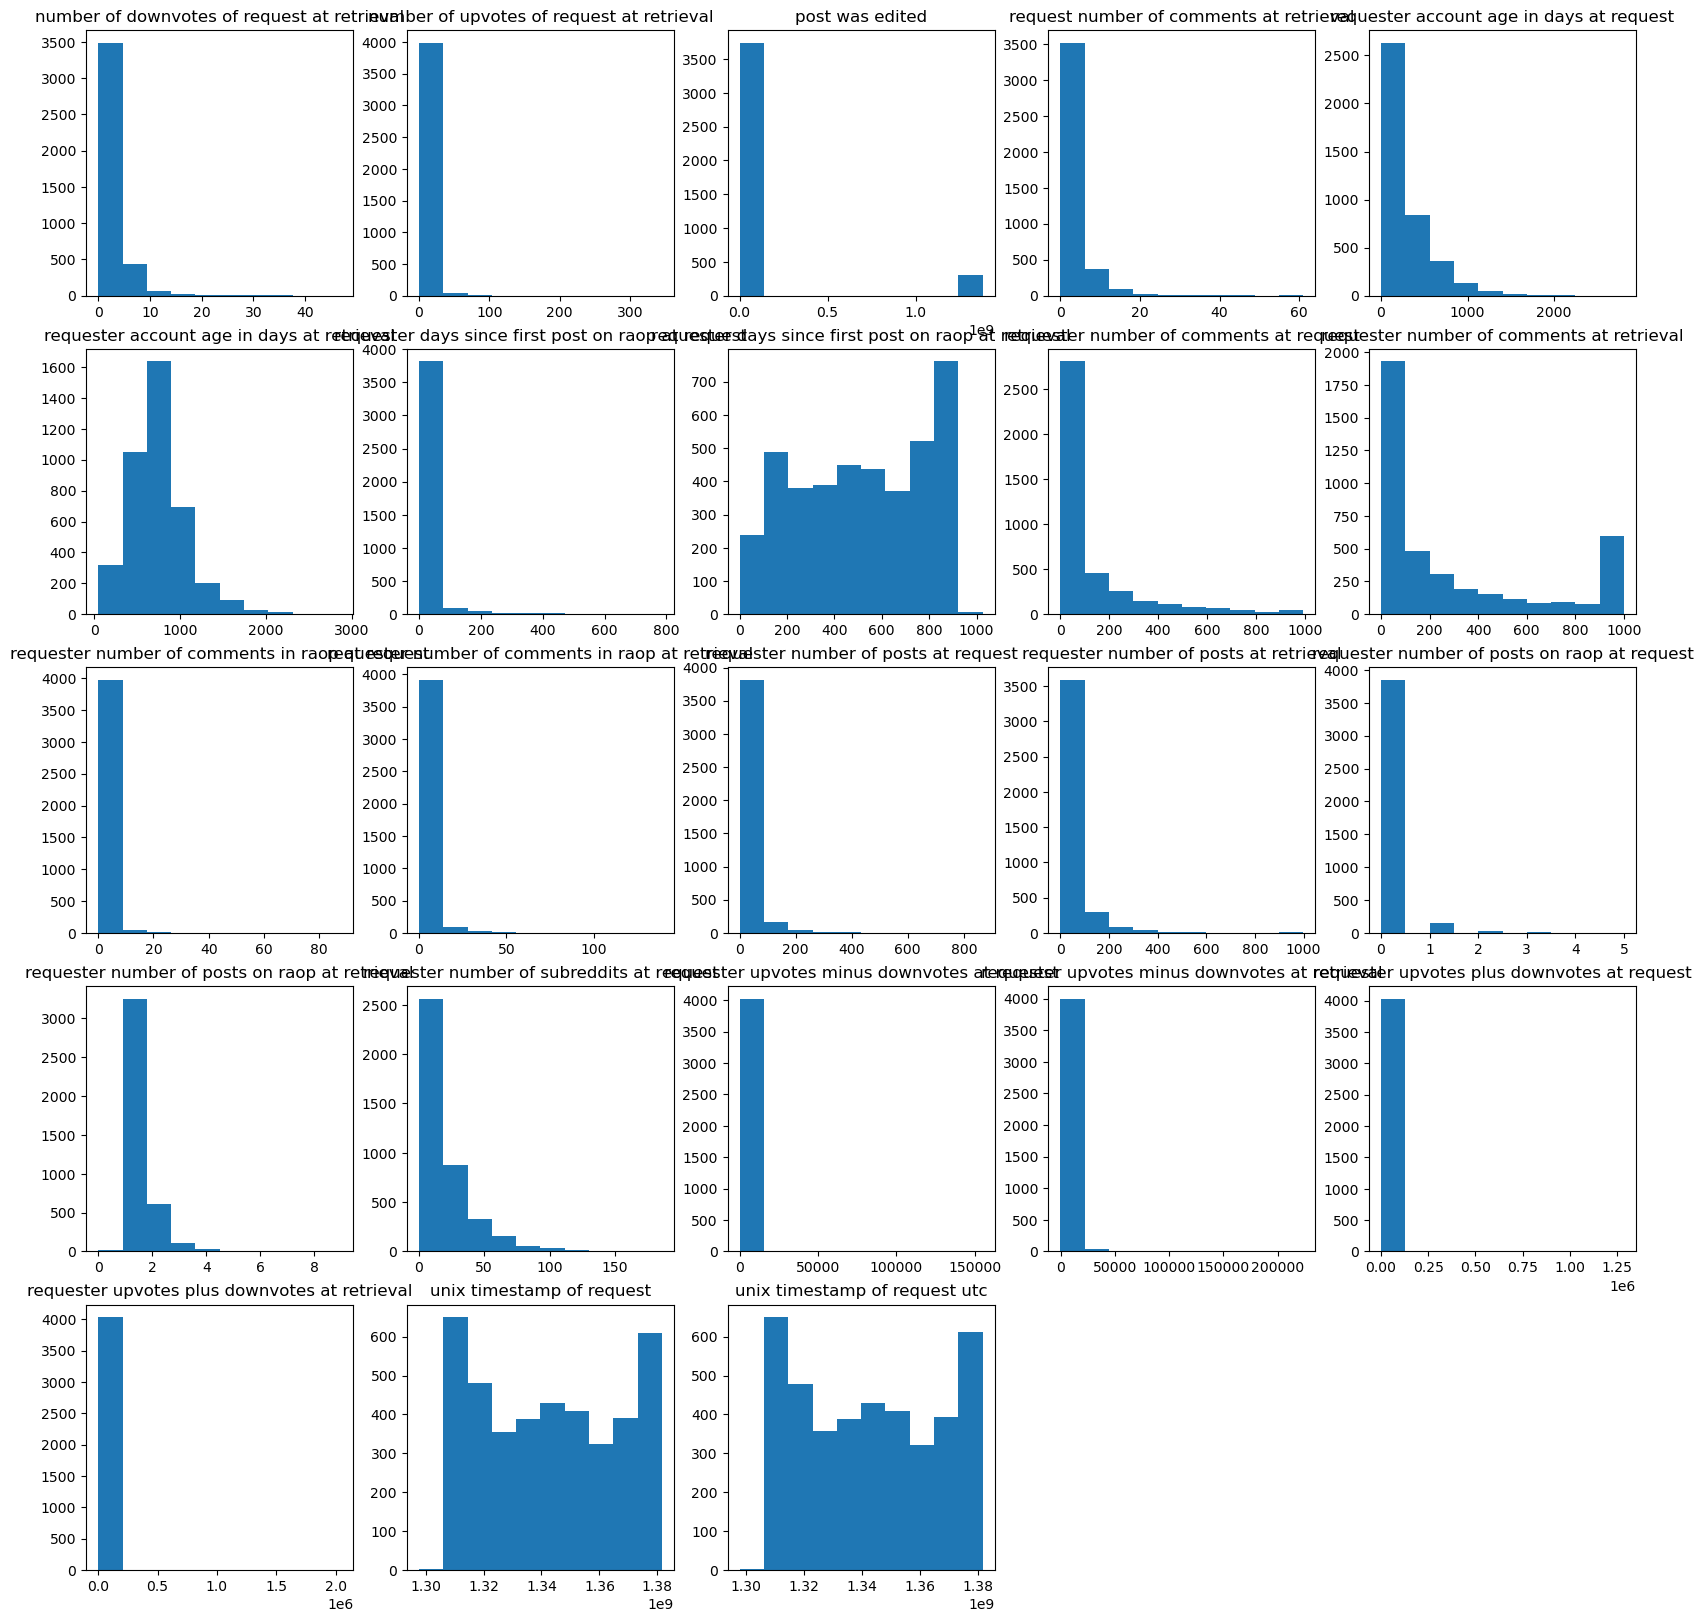

In [9]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
  plt.subplot(5, 5, i+1)
  plt.hist(np.array(training_data_num[num_cols[i]]))
  plt.title(num_cols[i].replace("_", " "), loc='center', wrap=True)
plt.show()

In [10]:
training_data_num_corr_matrix = training_data_num.corr()
#print(training_data_num_corr_matrix)


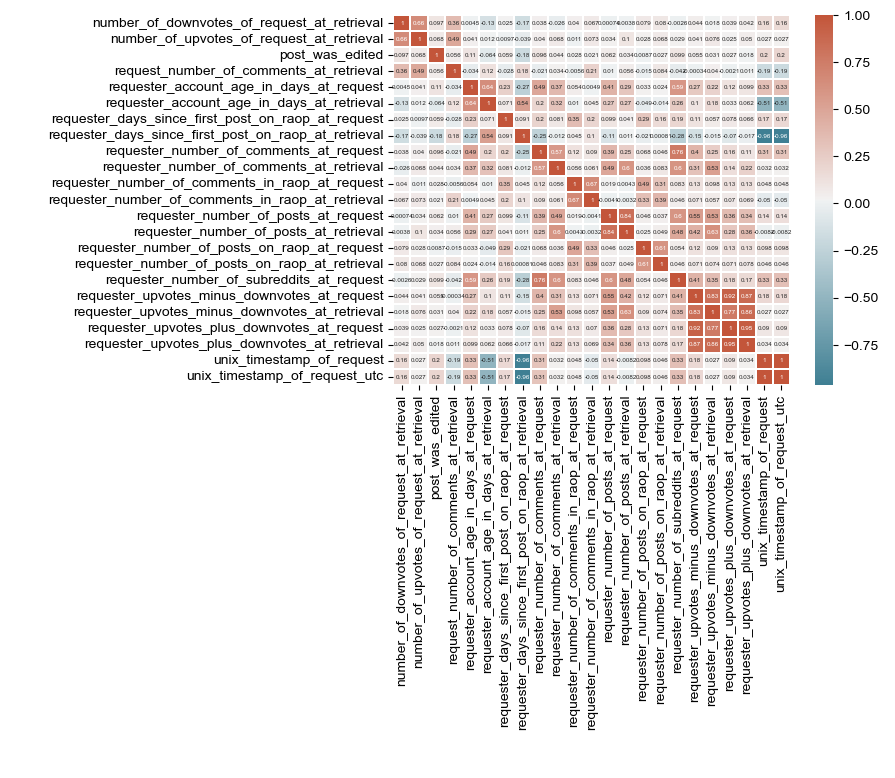

In [11]:
#matrix = df.corr().round(2)
sns.heatmap(training_data_num_corr_matrix,
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            linewidths=0.1,
            annot_kws={"fontsize":4.5})
sns.set(font_scale=1)
plt.show()

In [12]:
print(np.where(training_data['post_was_edited'] < 0))
post_was_edited_positive = np.where(training_data['post_was_edited'] > 1)
print(post_was_edited_positive)

(array([], dtype=int64),)
(array([   6,   19,   25,   31,   50,   54,   77,   80,   86,  104,  131,
        150,  173,  196,  222,  236,  239,  243,  262,  279,  280,  298,
        300,  310,  323,  330,  334,  339,  366,  378,  414,  421,  425,
        427,  433,  436,  440,  456,  472,  480,  499,  524,  540,  643,
        655,  658,  663,  670,  671,  672,  683,  691,  699,  702,  705,
        713,  728,  740,  741,  752,  786,  789,  793,  798,  804,  806,
        814,  823,  842,  850,  853,  855,  878,  882,  885,  894,  926,
        937,  941,  957,  971,  972,  974,  982,  998, 1006, 1034, 1037,
       1064, 1068, 1076, 1080, 1093, 1099, 1126, 1142, 1234, 1240, 1243,
       1245, 1275, 1277, 1283, 1288, 1296, 1306, 1318, 1362, 1365, 1368,
       1400, 1407, 1449, 1459, 1462, 1469, 1471, 1476, 1478, 1486, 1496,
       1509, 1512, 1513, 1515, 1518, 1555, 1559, 1561, 1570, 1598, 1623,
       1629, 1651, 1671, 1679, 1696, 1709, 1716, 1732, 1733, 1749, 1772,
       1774, 1804, 1807,

In [13]:
edited_outliers = training_data_num[training_data_num['post_was_edited'] > 1]
edited_outliers.head(2)

,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_number_of_comments_at_retrieval,requester_account_age_in_days_at_request,requester_account_age_in_days_at_retrieval,requester_days_since_first_post_on_raop_at_request,requester_days_since_first_post_on_raop_at_retrieval,requester_number_of_comments_at_request,requester_number_of_comments_at_retrieval,...,requester_number_of_posts_at_retrieval,requester_number_of_posts_on_raop_at_request,requester_number_of_posts_on_raop_at_retrieval,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,unix_timestamp_of_request,unix_timestamp_of_request_utc
6,1,2,1342028318,3,0.000000,513.288391,0.0,513.288391,0,8,...,1,0,1,0,0,16,0,28,1341969695,1341966095
19,2,1,1378419359,0,556.095359,647.516192,0.0,91.379167,145,145,...,23,0,1,20,505,504,857,860,1378422607,1378419007


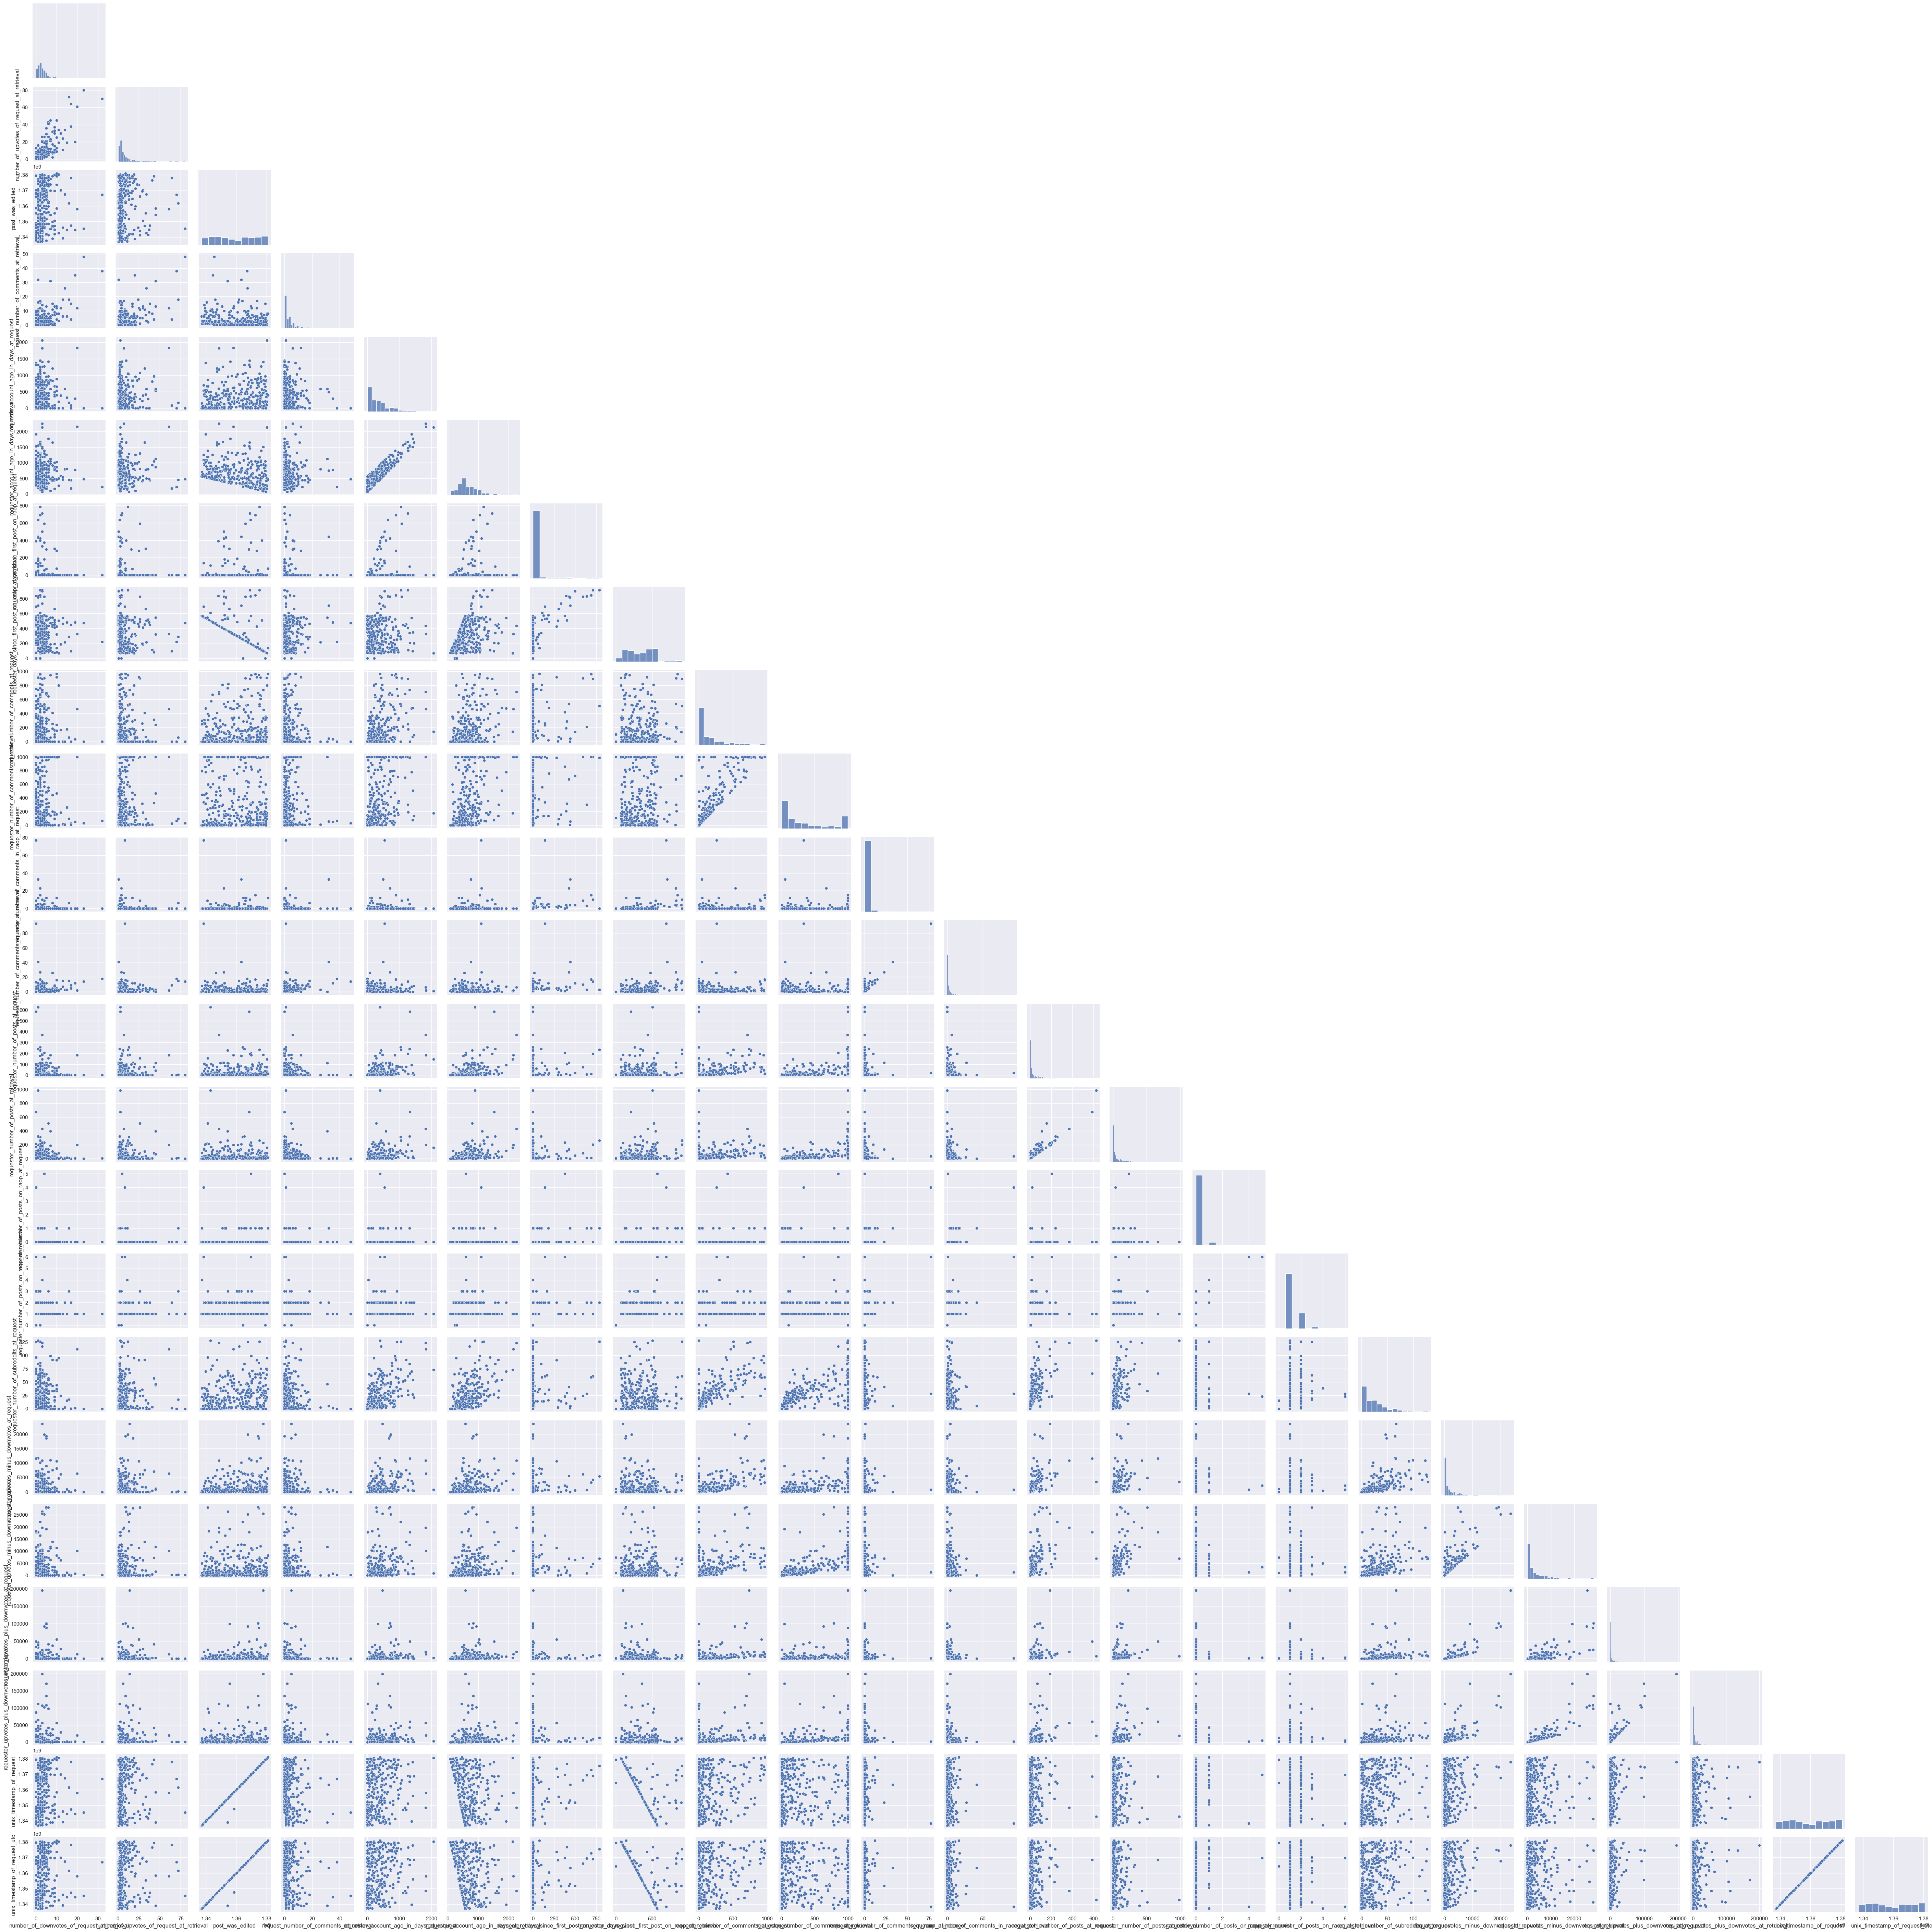

In [14]:


#this will make this cell fail. Comment out if you want to run, but it takes a long time (a few minutes)

edited_outliers_corr_matrix = edited_outliers.corr()
#print(edited_outliers_corr_matrix)
sns.pairplot(edited_outliers, corner = True)

In [15]:
X_training_data = np.array(training_data.drop('requester_received_pizza', axis = 1))
print(X_training_data.shape)

Y_training_data = np.array(training_data['requester_received_pizza'])
print(Y_training_data.shape)

(4040, 31)
(4040,)


In [16]:
x_training_data_title = np.array(training_data['request_title'])
print(x_training_data_title[0:100])

['Request Colorado Springs Help Us Please'
 '[Request] California, No cash and I could use some dinner'
 '[Request] Hungry couple in Dundee, Scotland would love some pizza!'
 '[Request] In Canada (Ontario), just got home from school. Need pizza.'
 '[Request] Old friend coming to visit. Would LOVE to feed her some dinner. Indiana'
 "[REQUEST] I'll give a two week xbox live code for a slice of pie!"
 '[Request] Help me give back to my roomies on Friday'
 'random acts of pizza, i have a request, if nothing, direct me to the correct sub please...'
 '[Request] Queensland Australia, Recently moved, little hungry :('
 "[REQUEST]We're in need of some om noms..."
 '[REQUEST] Bummed out in Chicago. Too broke to go out on a Friday night. Pizza would definitely cheer me up.'
 '[Request] Would love a pizza tonight'
 '[REQUEST] Georgia, USA Please help me family of 6 including two toddlers and two senior citizens please read '
 '[Request]  Broke in ATL.  ' '[Request] Make my bro in law a believer!'


In [17]:
x_training_data_post = np.array(training_data['request_text'])
print(x_training_data_post[100:])

['All alone in a seven bed after a long day at my work experience placement. Working for no money!\nSo please make my day. :)'
 "my rent is due very soon so I need to save my money but its either this pizza or ramen (cliche I know)     If you are ever in the LA area I'll smoke you out one day! (If you like that)"
 "Hey reddit,\n\nI'm a recent college grad from Virgina Tech, Go Hokies, with a degree in Accounting.  I'm currently sitting on almost $35000 in debt, and I don't know what to do.  I just checked my account and discovered I have $200 to my name. My rent is $950, all my bills are due and despite having sent out nearly 300 resumes in the past two months, I don't have a line on anything.\n\nI'm not one to beg or look for handouts, but I'm sitting here, constantly refreshing my inbox and Monster.com, hoping and praying for some kind of job offer, and have decided to swallow my pride for at least the afternoon and see if this community's good heart and generosity would give me a he

In [18]:
print('Number of Pizzas in Training:', len(Y_training_data[Y_training_data == 1]))
print('Number of NO Pizzas in Training:', len(Y_training_data[Y_training_data == 0]))
print('Pizza Ratio =', len(Y_training_data[Y_training_data == 1])
                          / len(Y_training_data[Y_training_data == 0]))

Number of Pizzas in Training: 994
Number of NO Pizzas in Training: 3046
Pizza Ratio = 0.3263296126066973


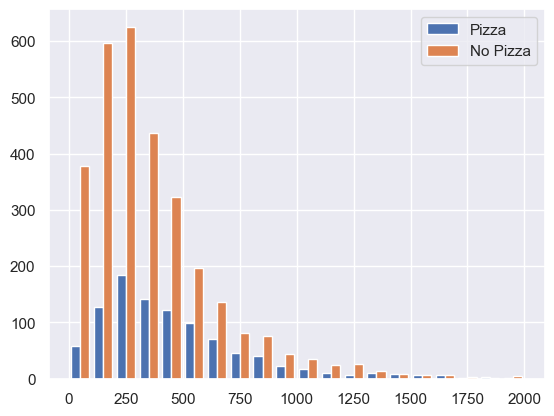

Shortest post - pizza: 0
Shortest post - no pizza: 0
Longest post - pizza: 4293
Longest post - no pizza: 4460
Average post length - pizza: 487.7354124748491
Average post length - no pizza: 378.3237032173342


In [19]:
## taken from HW9

# Create a list of lengths for training examples with a positive label.
text_lengths_pizza = [len(x) for (i, x) in enumerate(x_training_data_post) if Y_training_data[i]]

# And a list of lengths for training examples with a negative label.
text_lengths_no_pizza = [len(x) for (i, x) in enumerate(x_training_data_post) if not Y_training_data[i]]

# The histogram function can take a list of inputs and corresponding labels.
plt.hist([text_lengths_pizza, text_lengths_no_pizza], bins=20, range=(0, 2000),
         label=['Pizza', 'No Pizza'])
plt.legend()
plt.show()

# Also check the longest reviews.
print('Shortest post - pizza:', min(text_lengths_pizza))
print('Shortest post - no pizza:', min(text_lengths_no_pizza))
print('Longest post - pizza:', max(text_lengths_pizza))
print('Longest post - no pizza:', max(text_lengths_no_pizza))
print('Average post length - pizza:', np.mean(text_lengths_pizza))
print('Average post length - no pizza:', np.mean(text_lengths_no_pizza))

In [20]:
# isolate pizza posts
posts_pizza = [x for (i, x) in enumerate(x_training_data_post) if Y_training_data[i]]

# isolate non pizza posts
posts_no_pizza = [x for (i, x) in enumerate(x_training_data_post) if not Y_training_data[i]]

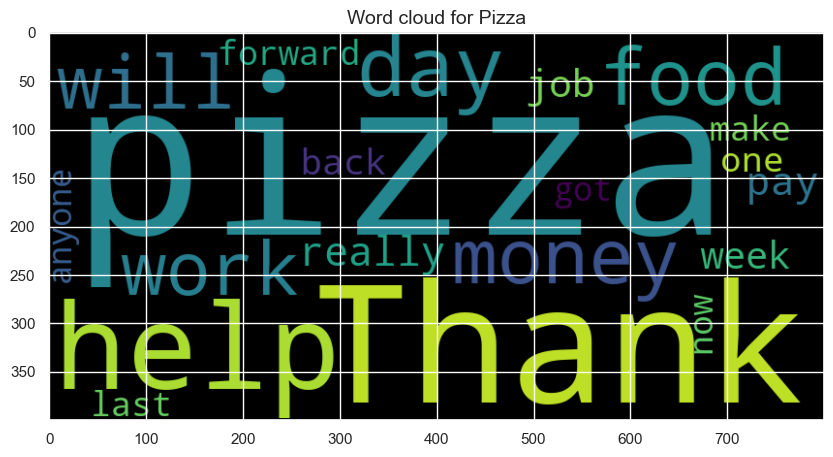

In [88]:
plt.figure(figsize = (10,10))
wc = WordCloud(
    max_words = 20,
    width = 800,
    height = 400).generate(" ".join(posts_pizza))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Pizza',fontsize=14);

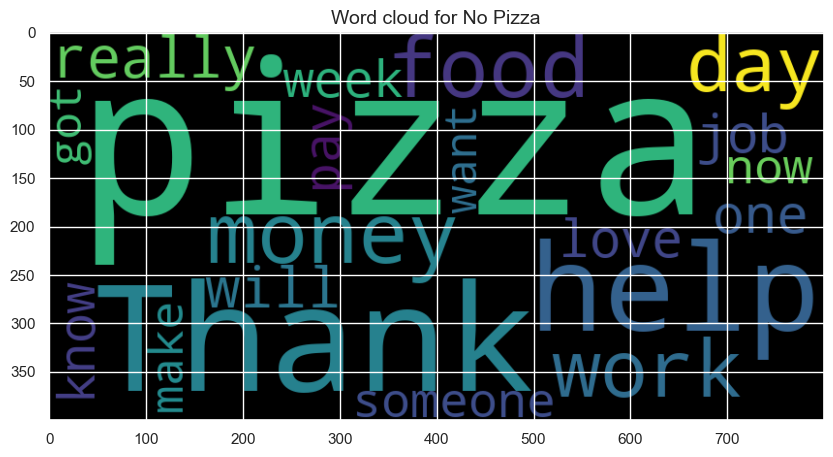

In [89]:
plt.figure(figsize = (10,10))
wc = WordCloud(
    max_words = 20,
    width = 800,
    height = 400).generate(" ".join(posts_no_pizza))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for No Pizza',fontsize=14);

# Start looking at building our vocabulary to plot

In [31]:
import tensorflow_datasets as tfds
from collections import Counter
import tensorflow as tf

In [73]:
x_training_data_post_df = pd.DataFrame(x_training_data_post)
type(x_training_data_post_df)

pandas.core.frame.DataFrame

In [74]:
type(x_training_data_post)

numpy.ndarray

In [75]:
try:
    tokenizer = tfds.features.text.Tokenizer()
except AttributeError:
    tokenizer = tfds.deprecated.text.Tokenizer()

# create an instance of the Counter class
token_counts = Counter()

for example in x_training_data_post:
    tokens = tokenizer.tokenize(str(example))
    token_counts.update(tokens)
    
print('Size of training vocabulary:', len(token_counts))

Size of training vocabulary: 14900


In [81]:
# look at posts

print('Print second post in training data:')
print('------')
for idx, example in enumerate(x_training_data_post[:2]):
    if idx == 1:
        print(example)
        tokens = tokenizer.tokenize(str(example))

print('\nPrinting the first 10 tokens:')
print('------')
tokens = tokenizer.tokenize(str(x_training_data_post[0]))
[val for idx, val in enumerate(tokens) if idx < 12]


Print second post in training data:
------
I spent the last money I had on gas today. Im broke until next Thursday :(

Printing the first 10 tokens:
------


['Hi',
 'I',
 'am',
 'in',
 'need',
 'of',
 'food',
 'for',
 'my',
 '4',
 'children',
 'we']

In [82]:
# create an instance of the TF encoder class
try:
    encoder = tfds.features.text.TokenTextEncoder(token_counts) # token_counts contains our training vocabulary
except AttributeError:
    encoder = tfds.deprecated.text.TokenTextEncoder(token_counts)

# try an example first (first 12 characters from the second review in training data)
example_str = 'I spent the last money I had on gas today. Im broke until next Thursday :('
encoder.encode(example_str) # the encode method transforms the text into integers

[2, 56, 57, 58, 59, 2, 60, 61, 62, 63, 64, 65, 66, 67, 68]